In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
import statistics


In [4]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\heat exchanger.csv")
df1=df.assign(M=(df["h"]*df["Lexposed"]/(8*387.6)))

df1

,di/do,do,t*=t/do,t,del*=del/do,del,Lexposed,At (total outer surface area),h,qcu (heat flux copper),qss (heat flux Steel),qo (maximum heat flux possible),qcu/qo (efficiency copper),qss/qo (efficiency steel),Qcu (rate of heat transfer copper),Qss (rate of heat transfer steel),Qo (max. rate of HT possible),Ecu (effectiveness copper),Ess (effectiveness steel),M
0,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,5,499.875,496.331,500,0.999750,0.992662,37.590600,37.324091,9.425,3.988393,3.960116,0.121259
1,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,20,1998.007,1942.193,2000,0.999004,0.971097,150.250126,146.052914,37.700,3.985414,3.874083,0.485036
2,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,50,4987.556,4649.601,5000,0.997511,0.929920,375.064211,349.649995,94.250,3.979461,3.709814,1.212590
3,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,100,9950.311,8667.041,10000,0.995031,0.866704,748.263387,651.761483,188.500,3.969567,3.457621,2.425181
4,0.8333,6,0.0333,0.2,0.1,0.6,75.2,0.0752,200,19801.930,15162.990,20000,0.990097,0.758150,1489.105136,1140.256848,377.000,3.949881,3.024554,4.850361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.8333,6,0.4000,2.4,8.0,48.0,2332.8,2.3328,5,496.002,414.919,500,0.992004,0.829838,1157.073466,967.923043,9.425,122.766415,102.697405,3.761610
146,0.8333,6,0.4000,2.4,8.0,48.0,2332.8,2.3328,20,1936.870,969.855,2000,0.968435,0.484928,4518.330336,2262.477744,37.700,119.849611,60.012672,15.046440
147,0.8333,6,0.4000,2.4,8.0,48.0,2332.8,2.3328,50,4615.584,1152.152,5000,0.923117,0.230430,10767.234360,2687.740186,94.250,114.241213,28.517137,37.616099
148,0.8333,6,0.4000,2.4,8.0,48.0,2332.8,2.3328,100,8526.856,1429.178,10000,0.852686,0.142918,19891.449680,3333.986438,188.500,105.524932,17.686931,75.232198


In [5]:
df1.describe()

,di/do,do,t*=t/do,t,del*=del/do,del,Lexposed,At (total outer surface area),h,qcu (heat flux copper),qss (heat flux Steel),qo (maximum heat flux possible),qcu/qo (efficiency copper),qss/qo (efficiency steel),Qcu (rate of heat transfer copper),Qss (rate of heat transfer steel),Qo (max. rate of HT possible),Ecu (effectiveness copper),Ess (effectiveness steel),M
count,1.500000e+02,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,8.333000e-01,6.0,0.199967,1.200000,2.400000,14.400000,729.600000,0.729600,75.000000,6701.783993,4016.951693,7500.000000,0.938005,0.671266,4124.458687,1416.214659,141.375000,33.048566,16.325606,17.647059
std,2.450673e-15,0.0,0.152060,0.912258,2.587398,15.524391,745.206498,0.745206,70.663205,6390.694073,4588.970948,7066.320535,0.140497,0.331661,5987.159546,1215.132561,133.200142,32.401981,16.935829,29.796048
min,8.333000e-01,6.0,0.033300,0.200000,0.100000,0.600000,57.600000,0.057600,5.000000,467.466000,122.442000,500.000000,0.185905,0.030448,28.798906,28.775290,9.425000,3.051052,2.953172,0.092879
25%,8.333000e-01,6.0,0.033300,0.200000,0.400000,2.400000,155.200000,0.155200,20.000000,1960.935000,619.616250,2000.000000,0.953442,0.315637,542.715336,477.011598,37.700000,8.222160,5.478381,1.754386
50%,8.333000e-01,6.0,0.166600,1.000000,1.250000,7.500000,397.600000,0.397600,50.000000,4908.206500,1943.379500,5000.000000,0.991898,0.825972,1588.865416,1078.465394,94.250000,20.094308,11.311672,5.159959
75%,8.333000e-01,6.0,0.400000,2.400000,4.000000,24.000000,1192.000000,1.192000,100.000000,9912.579250,5060.683750,10000.000000,0.998366,0.962425,5511.521534,2168.532339,188.500000,54.562753,18.922194,19.175697
max,8.333000e-01,6.0,0.400000,2.400000,8.000000,48.000000,2350.400000,2.350400,200.000000,19969.560000,19328.920000,20000.000000,0.999962,0.999142,34013.437060,5153.988096,377.000000,122.766415,102.697405,151.599587


(array([60., 30., 15.,  0., 15.,  0.,  0., 15.,  0., 15.]),
 array([0.1 , 0.89, 1.68, 2.47, 3.26, 4.05, 4.84, 5.63, 6.42, 7.21, 8.  ]),
 <BarContainer object of 10 artists>)

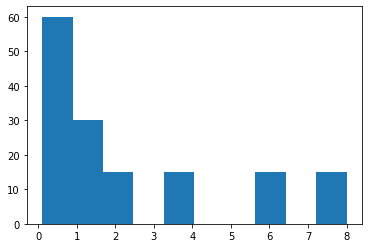

In [6]:
plt.hist(df1["del*=del/do"])

(array([50.,  0.,  0., 50.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0.0333 , 0.06997, 0.10664, 0.14331, 0.17998, 0.21665, 0.25332,
        0.28999, 0.32666, 0.36333, 0.4    ]),
 <BarContainer object of 10 artists>)

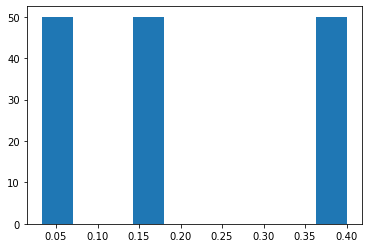

In [7]:
plt.hist(df1["t*=t/do"])

(array([107.,  17.,  11.,   3.,   3.,   3.,   0.,   3.,   0.,   3.]),
 array([9.28792570e-02, 1.52435501e+01, 3.03942208e+01, 4.55448916e+01,
        6.06955624e+01, 7.58462332e+01, 9.09969040e+01, 1.06147575e+02,
        1.21298246e+02, 1.36448916e+02, 1.51599587e+02]),
 <BarContainer object of 10 artists>)

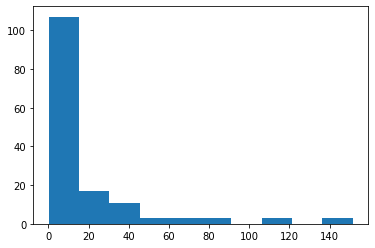

In [8]:
plt.hist(df1["M"])

(array([  2.,   1.,   0.,   2.,   2.,   1.,   3.,   5.,   9., 125.]),
 array([0.18590525, 0.26731092, 0.3487166 , 0.43012227, 0.51152795,
        0.59293363, 0.6743393 , 0.75574498, 0.83715065, 0.91855632,
        0.999962  ]),
 <BarContainer object of 10 artists>)

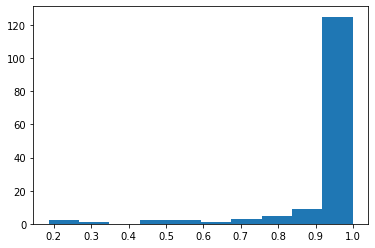

In [9]:
plt.hist(df1["qcu/qo (efficiency copper)"])

In [10]:
df_final=df1[["del*=del/do","t*=t/do","M","qcu/qo (efficiency copper)"]]
df_final

,del*=del/do,t*=t/do,M,qcu/qo (efficiency copper)
0,0.1,0.0333,0.121259,0.999750
1,0.1,0.0333,0.485036,0.999004
2,0.1,0.0333,1.212590,0.997511
3,0.1,0.0333,2.425181,0.995031
4,0.1,0.0333,4.850361,0.990097
...,...,...,...,...
145,8.0,0.4000,3.761610,0.992004
146,8.0,0.4000,15.046440,0.968435
147,8.0,0.4000,37.616099,0.923117
148,8.0,0.4000,75.232198,0.852686


<AxesSubplot:xlabel='t*=t/do', ylabel='qcu/qo (efficiency copper)'>

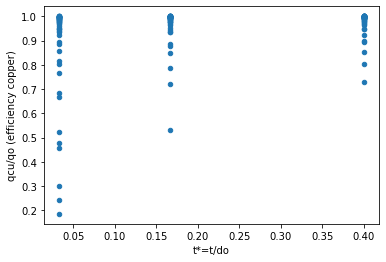

In [11]:
df_final.plot(kind='scatter',x="t*=t/do" , y="qcu/qo (efficiency copper)")

<AxesSubplot:xlabel='del*=del/do', ylabel='qcu/qo (efficiency copper)'>

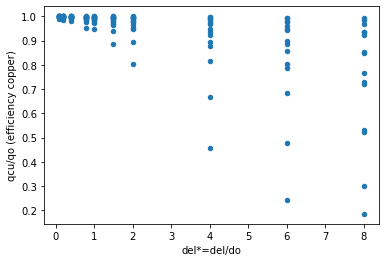

In [12]:
df_final.plot(kind='scatter',x="del*=del/do" , y="qcu/qo (efficiency copper)")

<AxesSubplot:xlabel='M', ylabel='qcu/qo (efficiency copper)'>

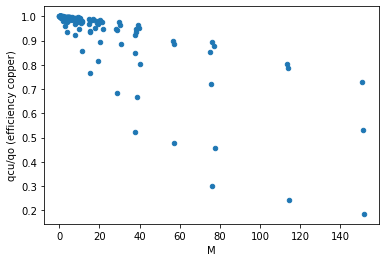

In [13]:
df_final.plot(kind='scatter',x="M" , y="qcu/qo (efficiency copper)")

In [14]:
X=df_final[["del*=del/do","t*=t/do","M"]].values
y=df_final["qcu/qo (efficiency copper)"].values

In [15]:
scaler= preprocessing.StandardScaler().fit(X)
X =scaler.transform(X.astype(float))
scaler= preprocessing.MinMaxScaler().fit(X)
X =scaler.transform(X.astype(float))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.65, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (52, 3) (52,)
Test set: (98, 3) (98,)


In [17]:
X=X_train
y=y_train 

In [18]:
D=np.zeros([len(X),len(X)])
for i in range(0,len(X)):
    for j in range(0,len(X)):
        D[i,j]=scipy.spatial.distance.euclidean(X[i,:],X[j,:])
D

array([[0.        , 1.18462284, 0.85415785, ..., 0.74685815, 0.59662748,
        0.63308958],
       [1.18462284, 0.        , 0.37250082, ..., 1.00754938, 1.00976663,
        1.00070151],
       [0.85415785, 0.37250082, 0.        , ..., 0.66071271, 0.66039374,
        0.63977169],
       ...,
       [0.74685815, 1.00754938, 0.66071271, ..., 0.        , 0.24671663,
        0.11429457],
       [0.59662748, 1.00976663, 0.66039374, ..., 0.24671663, 0.        ,
        0.17434837],
       [0.63308958, 1.00070151, 0.63977169, ..., 0.11429457, 0.17434837,
        0.        ]])

In [19]:
DF=pd.DataFrame(D)

In [20]:
def myfunc(ll,k):
    #a=sorted(ll,key=lambda x:(x[0] , x[1]))
    ll.sort()
    a=ll[1:k+1]
    hh=[]
    ooo=[]
    for elem in a:
        h=elem[1]
        hh.append(h)
    predicted_efficiency=statistics.mean(hh)
    return(predicted_efficiency)


In [21]:
k=2
y_predicted=np.zeros_like(y)
for ii in range(0,len(X)):
    ll=[]
    for i in range(0,len(X)):
        l=[DF.iloc[ii,i],y[i]]
        ll.append(l)
    class_=myfunc(ll,k)
    y_predicted[ii]=class_

In [22]:
y_predicted

array([0.98516425, 0.99085605, 0.99102645, 0.4828213 , 0.99832025,
       0.997445  , 0.87748585, 0.9917027 , 0.9839315 , 0.9457759 ,
       0.9345689 , 0.948301  , 0.5431221 , 0.9917027 , 0.99577135,
       0.93418905, 0.9814835 , 0.9981033 , 0.94335015, 0.8220276 ,
       0.8152717 , 0.9978577 , 0.8086586 , 0.9447738 , 0.9575604 ,
       0.93450725, 0.9929965 , 0.271527  , 0.99739055, 0.94335015,
       0.9981033 , 0.9993838 , 0.98019905, 0.9934119 , 0.9970363 ,
       0.9993988 , 0.99744325, 0.7887444 , 0.24238447, 0.9802195 ,
       0.99971975, 0.99921555, 0.7992599 , 0.99885835, 0.99800775,
       0.99921555, 0.9621111 , 0.9987141 , 0.97927625, 0.9983881 ,
       0.9970363 , 0.9978577 ])

In [23]:
from sklearn.metrics import r2_score
print("R2score_train_mycode=",r2_score(y,y_predicted))

R2score_train_mycode= 0.9102727511502716


R2score_train_knn_skitlearn= 1.0
R2score_test_knn_skitlearn= 0.4326656287934537
R2score_train_knn_skitlearn= 0.9701685745739621
R2score_test_knn_skitlearn= 0.8408190823847085
R2score_train_knn_skitlearn= 0.960121222733454
R2score_test_knn_skitlearn= 0.8798006028921791
R2score_train_knn_skitlearn= 0.8948797398447493
R2score_test_knn_skitlearn= 0.8071659761993369
R2score_train_knn_skitlearn= 0.8033285779058579
R2score_test_knn_skitlearn= 0.7937503135748066
R2score_train_knn_skitlearn= 0.7629342230675593
R2score_test_knn_skitlearn= 0.7602850371354708
R2score_train_knn_skitlearn= 0.711444783198888
R2score_test_knn_skitlearn= 0.7499003099740063
R2score_train_knn_skitlearn= 0.6987681452263391
R2score_test_knn_skitlearn= 0.73849492786674


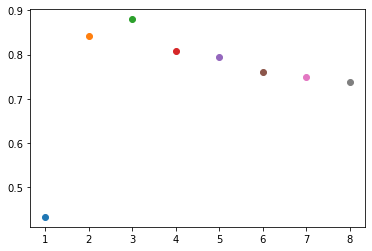

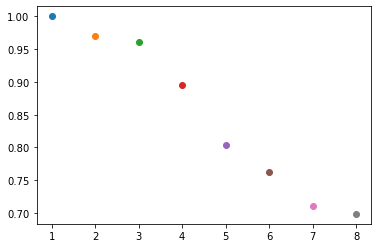

In [24]:
kk=[1,2,3,4,5,6,7,8]
for kkk in kk:
    model=KNeighborsRegressor(n_neighbors=kkk,p=2)
    model.fit(X,y)
    output=model.predict(X)
    print("R2score_train_knn_skitlearn=",r2_score(y,output))
    output_test=model.predict(X_test)
    print("R2score_test_knn_skitlearn=",r2_score(y_test,output_test))
    plt.figure(1)
    plt.scatter(x=kkk,y=r2_score(y_test,output_test))
    plt.figure(2)
    plt.scatter(x=kkk,y=r2_score(y,output))


In [25]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [26]:
output_regr=regr.predict(X)
output_regr

array([1.01781802, 0.92620905, 0.98983214, 0.60338378, 0.98664036,
       0.96271523, 0.66596741, 0.98208108, 0.95382336, 0.9982947 ,
       0.88828078, 0.93578932, 0.63988995, 0.87693646, 0.96771516,
       0.90315011, 0.98280123, 1.06031182, 0.88009116, 0.90009106,
       0.81351158, 1.06857866, 0.91961438, 0.92144372, 0.95179699,
       0.79604498, 1.00068362, 0.29106033, 0.96310337, 0.95866102,
       1.05307942, 1.00998489, 0.96175737, 0.97720818, 1.0448097 ,
       1.00879244, 1.05256076, 0.78785537, 0.45983556, 0.85880156,
       1.00609414, 1.01193027, 0.49719217, 1.05204786, 1.06814057,
       0.99960954, 0.96673371, 1.01290643, 0.9035586 , 1.06048663,
       0.94234396, 1.04768281])

In [27]:
print("R2score_train_linear_skitlearn=",r2_score(y,output_regr))

R2score_train_linear_skitlearn= 0.7734859512054086


In [28]:
D_test=np.zeros([len(X_test),len(X_test)])
for i in range(0,len(X_test)):
    for j in range(0,len(X_test)):
        D_test[i,j]=scipy.spatial.distance.euclidean(X_test[i,:],X_test[j,:])

DF_test=pd.DataFrame(D_test)

def myfunc_test(ll,k):
    #a=sorted(ll,key=lambda x:(x[0] , x[1]))
    ll.sort()
    a=ll[1:k+1]
    if ll[k]==ll[k+1]:
        print('error')
    hh=[]
    ooo=[]
    for elem in a:
        h=elem[1]
        hh.append(h)
    predicted_efficiency=statistics.mean(hh)
    return(predicted_efficiency)


y_predicted_test=np.zeros_like(y_test)
for ii in range(0,len(X_test)):
    ll_test=[]
    for i in range(0,len(X_test)):
        l_test=[DF_test.iloc[ii,i],y_test[i]]
        ll_test.append(l_test)
    class_test=myfunc_test(ll_test,k)
    y_predicted_test[ii]=class_test

from sklearn.metrics import r2_score
print("R2score_train_mycode=",r2_score(y_test,y_predicted_test))

R2score_train_mycode= 0.8212563736746465


In [30]:
from sklearn.svm import SVR
model_SVR=SVR('linear')
model_SVR.fit(X,y)
output_SVR=model.predict(X_test)
print("R2score_test_knn_skitlearn=",r2_score(y_test,output_SVR))


R2score_test_knn_skitlearn= 0.73849492786674


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
